# SQL - Conceptos generales

<img src= 'https://upload.wikimedia.org/wikipedia/commons/6/6f/Sql_database_shortcut_icon.png' />

Las bases de datos SQL generalmente operan con el modelo cliente-servidor. 
Se cuenta con un servidor de BD donde se accede a la información y se ejecutan las instrucciones, y el/los cliente/s se conectan mediante una interfaz a través de la cual le envían peticiones y reciben las respuestas.


SQLite es Open Source y se ha instalado por defecto con Python, es decir forma parte de la biblioteca estándar, no tenemos que instalar ningún módulo con pip. 

Al utilizar SQLite no hay necesidad de tener un servidor externo corriendo, lo que simplifica la implementación de los ejemplos que aquí veremos, ya que en caso contrario, deberíamos primero instalar un servidor de base de datos en nuestra computadora, crear las tablas allí y luego conectarnos usando un **conector** (todas las bases de datos proveen los conectores para todos los lenguajes de programación que soportan), por ejemplo si estamos programando en python y queremos conectarnos a una base de datos MySql, debemos descargar primero el conector que a día de hoy (9/6/22) está en la versión "Connector/Python 8.0.29": https://dev.mysql.com/downloads/connector/python/



# 4 conceptos de bases de datos relacionales

Para realizar operaciones en una base de datos relacional es importante conocer los siguientes conceptos: DDL, DML, DCL y TCL

Definamos cada uno y luego vayamos avanzando sobre ejemplos prácticos.



# DDL (Data Definition Language) 

Este lenguaje permite crear las estructuras que almacenarán los datos.

Operaciones soportadas por DDL:
- CREATE: Utilizado para crear nuevas tablas, campos e índices.
- ALTER: Utilizado para modificar las tablas agregando campos o cambiando la definición de los campos.
- DROP: Empleado para eliminar tablas e índices.
- TRUNCATE: Empleado para eliminar todos los registros de una tabla.
- COMMENT: Utilizado para agregar comentarios al diccionario de datos.
- RENAME: Tal como su nombre lo indica es utilizado para renombrar objetos.



# DML (Data Manipulation Language)

Este lenguaje permite realizar diferentes acciones a los datos que se encuentran en una base de datos.
Permite recuperar, almacenar, modificar, eliminar, insertar y actualizar datos de una base de datos. Es lo que más a menudo vamos a estar utilizando.

Operaciones soportadas por DML:
- SELECT: Utilizado para consultar registros de la base de datos que satisfagan un criterio determinado.
- INSERT: Utilizado para cargar de datos en la base de datos en una única operación.
- UPDATE: Utilizado para modificar los valores de los campos y registros especificados
- DELETE: Utilizado para eliminar registros de una tabla de una base de datos.

# DCL (Data Control Language)

Este lenguaje permite crear roles, permisos e integridad referencial, así como el control al acceso a la base de datos.

Operaciones soportadas por DCL:
- GRANT: Usado para otorgar privilegios de acceso de usuario a la base de datos.
- REVOKE: Utilizado para retirar privilegios de acceso otorgados con el comando GRANT.


# TCL (Transactional Control Language)

Permite administrar diferentes transacciones que ocurren dentro de una base de datos.

Operaciones soportadas por TCL:
- COMMIT: Empleado para persistir en la base de datos el trabajo hecho.
- ROLLBACK: Utilizado para deshacer la modificación que hice desde el último COMMIT.




---

Comencemos creando una instancia de SQLite:

Para crear o abrir una conexión con una base de datos existente debemos llamar a la función 'connect' del módulo 'sqlite3' y luego abrir una conexion a una base de datos

In [ ]:
import sqlite3

Valiendonos del Lenguaje DDL podemos comenzar a crear las tablas que nuestra base de datos contendrá.

Por ejemplo vamos a crear una tabla de Clientes y otra tabla de Articulos.

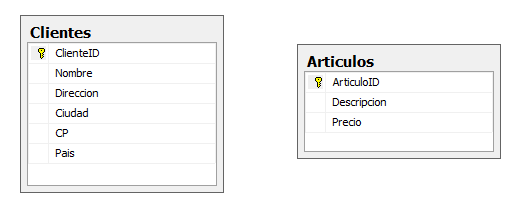

Creación de la primer tabla:

Tipos de datos de SQLite:


- NULL. The value is a NULL value.

- INTEGER. The value is a signed integer, stored in 0, 1, 2, 3, 4, 6, or 8 bytes depending on the magnitude of the value.

- REAL. The value is a floating point value, stored as an 8-byte IEEE floating point number.

- TEXT. The value is a text string, stored using the database encoding (UTF-8, UTF-16BE or UTF-16LE).

- BLOB. The value is a blob of data, stored exactly as it was input.

**Tipos de datos para fechas**

SQLite no tiene un formato específico para fechas, pero las built-in functions de SQLite permiten guardar fecha en cualquiera de los siguientes 3 formatos:

- TEXT as ISO8601 strings ("YYYY-MM-DD HH:MM:SS.SSS").

- REAL as Julian day numbers, the number of days since noon in Greenwich on November 24, 4714 B.C. according to the proleptic Gregorian calendar.

- INTEGER as Unix Time, the number of seconds since 1970-01-01 00:00:00 UTC. 

In [ ]:
connection=sqlite3.connect("Diplo_DB.db") # Al ejecutar esta linea por primera vez creara la base de datos en la misma ubicación que nuestro script.
# Las veces sucesivas, solo se conectará.

try:
    connection.execute("""CREATE TABLE Clientes (
                            ClienteID INTEGER PRIMARY KEY AUTOINCREMENT,
                            Nombre TEXT,
                            Direccion TEXT,
                            Ciudad TEXT,
                            CP INTEGER,
                            Pais TEXT
                        )""")
    print('Tabla Clientes creada')
except sqlite3.OperationalError:
    print("Error al crear la tabla")
connection.close() # Luego de ejecutar las instrucciones, es una buena práctica siempre cerrar la conexión.

Más adelante veremos la utilidad de utilizar primary keys.

Creación de la segunda tabla:

¿Qué tiene de raro? ¿Qué cambiarían?

In [ ]:
connection=sqlite3.connect("Diplo_DB.db") # Al ejecutar esta linea por primera vez creara la base de datos en la misma ubicación que nuestro script.
# Las veces sucesivas, solo se conectará.

try:
    connection.execute("""CREATE TABLE Articulos(
                            ArticuloID INTEGER PRIMARY KEY AUTOINCREMENT,
                            Descripcion TEXT,
                            Precio INTEGER
                          )""")
    print('Tabla Articulos creada')
except sqlite3.OperationalError:
    print('Error al crear la tabla')
connection.close()

Lamentablemente, al día de hoy, por el modo de funcionamiento interno de este ligero motor de bases de datos, SQLite actualmente no soporta el comando de SQL "ALTER COLUMN"

Acá podemos ver el listado completo de funcionalidades SQL aún no soportadas https://www.sqlite.org/omitted.html

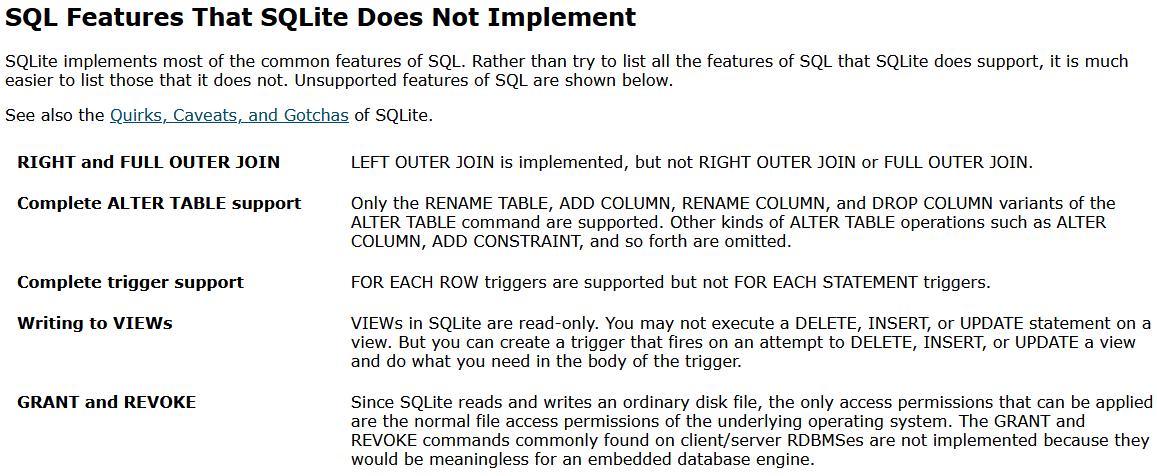



Lo bueno, es que fiel al estilo python, las columnas no son fuertemente tipadas, por lo que nos permitirá asignar valores reales a la columna que fue definida como "integer".

Pero ojo, esto no es una buena práctica, ya que solo funcionará con este motor de bases de datos, pero en cualquier otro, no nos permitirá hacer este cambio, por lo que para mantener la consistencia entre la definición y los datos, vamos a simplemente eliminar la tabla y volver a definirla correctamente.

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
try:
    connection.execute('DROP TABLE Articulos')
    print('Tabla Articulos eliminada')
except sqlite3.OperationalError:
    print('La operación no pude realizarse')
connection.close()

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")

try:
    connection.execute("""CREATE TABLE Articulos (
                            ArticuloID INTEGER PRIMARY KEY AUTOINCREMENT,
                            Descripcion TEXT,
                            Precio REAL
                        )""")
    print('Tabla Articulos creada')
except sqlite3.OperationalError:
    print('Error al crear la tabla')
connection.close()

En este punto tenemos dos tablas en nuestra base de datos, ambas aún sin elementos. 

Empecemos cargando articulos a la tabla correspondiente.

**¿Qué sentencia habría que usar?**

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio) 
              VALUES ('Resma A4', 148.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Resma Oficio', 150.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio) 
              VALUES ('Resma Carta', 149.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Teclado', 1150.50)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Mouse', 848.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Lapicera azul BIC', 110.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Carpeta Oficio', 750.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Goma de borrar', 150.75)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Corrector líquido', 290)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Repuesto agenda 2022', 780.75)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Lapiz negro', 89)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Goma de borrar', 97)''')
connection.commit() # Hacemos commit para persistir los cambios en la base
print('Cambios insertados')
cursor.close()
connection.close()

Antes de seguir insertando datos vamos a ver cómo va quedando la tabla. Para esto tenemos que usar otra sentencia de DML. 

**¿Cuál era?**

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
cursor.execute('SELECT * FROM Articulos') #Este cursor recibirá una lista que tendrá cada uno de los elementos de la tabla
# en este caso las columnas pedidas son * es decir "TODAS"
result = cursor.fetchall(); #con fetchall me cargará en la variable result TODOS los elementos que haya leido el cursor
print(f'Cantidad de elementos leídos: {len(result)}')
print(f'Listado de elementos: {result}')
cursor.close()
connection.close()

¿Por qué muestra por cada artículo 3 datos?

¿Y si quisiera mostrar únicamente los nombres de los artículos?

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
cursor.execute('SELECT Descripcion FROM Articulos') #Este cursor recibirá una lista que tendrá cada uno de los elementos de la tabla
# en este caso las columnas pedidas son * es decir "TODAS"
result = cursor.fetchall(); #con fetchall me cargará en la variable result TODOS los elementos que haya leido el cursor
print(f'Cantidad de elementos leídos: {len(result)}')
print(f'Listado de elementos: {result}')
cursor.close()
connection.close()

¿Y si quisiera mostrar por ejemplo únicamente los "nombres de los artículos cuyo valor supere los $500"?

Veamos más en detalle los posibles filtros que le podemos asignar a la cáusula SELECT.

# Cláusula SELECT

La instrucción SELECT se utiliza para seleccionar datos de una base de datos.

Los datos devueltos se almacenan en una tabla de resultados.

Cómo se puede entonces refinar la selección de datos, con las siguientes instrucciones. Y atención porque deben respetar el orden de ejecución con que las escribí:

- SELECT      -- Specify the columns to show
- FROM        -- Specify the tables to be queried
- WHERE       -- Filter the returned rows
- GROUP BY    -- Aggregate rows
- HAVING      -- Filter the aggregates
- ORDER BY    -- Order the returned rows
- LIMIT       -- Limit the returned rows

Sería erróneo por ejemplo intentar ejecutar "FROM Tabla SELECT ..." o "SELECT Where ... FROM Tabla".

Así mismo, algunos operadores van de la mano con otros, también sería erróneo ejecutar: "SELECT * FROM Tabla HAVING" .El HAVING requerirá primero haber hecho un agrupamiento.

Para hacer un poco más sencilla la codificación de ahora en adelante y no copiar todo el tiempo las mismas líneas de código, voy a definir una funcion que reciba una cadena de texto y se encarge de iniciar la conexión, hacer la query, cerrar la conexión y devolver el resultado.

In [ ]:
def query(query_a_ejecutar):
  connection=sqlite3.connect('Diplo_DB.db')
  cursor = connection.cursor()
  try: #Ya que está hago uso de try y catch para obtener una respuesta adecuada ante errores
    cursor.execute(query_a_ejecutar)
    result = cursor.fetchall()
  except sqlite3.OperationalError:
    print('Error al procesar la query')
    result = -1 #En caso de error devolverá el código de error -1
  finally:
    cursor.close()
    connection.close()
    return result

Para poder mostrar "Los nombres y precios de los articulos cuyo valor sea superior a $500" debo usar **condiciones**.

Las condiciones son expresiones lógicas a comprobar para la condición de filtro, que tras su resolución devuelven para cada fila TRUE o FALSE, en función de que se cumplan o no. Se puede utilizar cualquier expresión lógica y en ella utilizar diversos operadores como:

    > (Mayor)
    >= (Mayor o igual)
    < (Menor)
    <= (Menor o igual)
    = (Igual)
    <> o != (Distinto)
    IS [NOT] NULL (para comprobar si el valor de una columna es o no es nula, es decir, si contiene o no contiene algún valor)


In [ ]:
text = 'SELECT Descripcion, Precio FROM Articulos WHERE Precio > 500'
print(query(text))

Vemos que esto es una lista, entonces podríamos iterar para ver la información de manera más ordenada:

In [ ]:
resultado = query(text)

for item in resultado:
  print(item)

¿Si quiero además ordenar por precio de menor a mayor?

In [ ]:
text = 'SELECT Descripcion, Precio FROM Articulos WHERE Precio > 500 ORDER BY Precio'
print(query(text))

**Otros operadores**

- LIKE: para la comparación de un modelo. Para ello utiliza los caracteres comodín especiales: “%” y “_”. Con el primero indicamos que en su lugar puede ir cualquier cadena de caracteres, y con el segundo que puede ir cualquier carácter individual (un solo carácter). 

Con la combinación de estos caracteres podremos obtener múltiples patrones de búsqueda. 
Por ejemplo:

El nombre empieza por A: Nombre LIKE ‘A%’

El nombre acaba por A: Nombre LIKE ‘%A’

El nombre contiene la letra A: Nombre LIKE ‘%A%’

El nombre empieza por A y después contiene un solo carácter cualquiera: Nombre LIKE ‘A_’

El nombre empieza una A, después cualquier carácter, luego una E y al final cualquier cadena de caracteres: Nombre LIKE ‘A_E%’

- BETWEEN: para un intervalo de valores. 

Por ejemplo:

Clientes entre el 30 y el 100: CodCliente BETWEEN 30 AND 100

Clientes nacidos entre 1970 y 1979: FechaNac BETWEEN ‘19700101’ AND ‘19791231’

- IN( ): Para especificar una relación de valores concretos. 

Por ejemplo: Ventas de los Clientes 10, 15, 30 y 75: CodCliente IN(10, 15, 30, 75)

Por supuesto es posible combinar varias condiciones simples de los operadores anteriores utilizando los operadores lógicos OR, AND y NOT, así como el uso de paréntesis para controlar la prioridad de los operadores (como en matemáticas). Por ejemplo:  … (Cliente = 100 AND Provincia = 30) OR Ventas > 1000 … que sería para los clientes cuyo código es 30 y de la provincia 100 o cualquier cliente cuyas ventas superen 1000.

In [ ]:
text = 'SELECT Descripcion, Precio FROM Articulos WHERE Precio BETWEEN 750 AND 1500'
print(query(text))

In [ ]:
text = 'SELECT Descripcion, Precio FROM Articulos WHERE Descripcion LIKE \'Res%\''
print(query(text))

Y no olvidemos que siempre nos vamos a poder valer de nuestros ya conocidos DataFrames de Pandas para visualizar la información de manera más bonita.

Como siempre hay varias maneras de hacerlo:

1° opción: Crear un DataFrame a partir del diccionario resultante de la query.

In [ ]:
import pandas as pd
df = pd.DataFrame(query(text)) 
df

2° opción: Utilizar el método integrado de pandas para leer desde una query

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
df = pd.read_sql_query("SELECT Descripcion, Precio FROM Articulos", connection)
connection.close()
df

De manera análoga podremos trabajar con Pandas y luego guardar el contenido del Dataframe en la base de datos:

`df.to_sql("nombre_de_la_tabla", connection, if_exists="replace")`

# Cláusula UPDATE

¿Y si ahora quisieramos actualizar el precio de algún producto?

Por ejemplo quiero que las "Resmas" de cualquier tipo pasen a valer $350. Entonces tendremos que usar la cláusula **UPDATE**

In [ ]:
def update(query_a_ejecutar):
  connection=sqlite3.connect("Diplo_DB.db")
  cursor = connection.cursor()
  try: #Ya que está hago uso de try y catch para obtener una respuesta adecuada ante errores
    cursor.execute(query_a_ejecutar)
    connection.commit() #Persisto el cambio en la base
    print('Campo actualizado')
    result = 1
  except sqlite3.Error as error:
    print(f'Error al actualizar: {error}')
    result = -1 #En caso de error devolverá el código de error -1
  finally:
    cursor.close()
    connection.close()
    return result

In [ ]:
text = 'UPDATE Articulos SET Precio = 350 WHERE Descripcion LIKE \'%Resma%\''
update(text)

Comprobemos los resultados

In [ ]:
text = 'SELECT * FROM Articulos WHERE Descripcion LIKE \'%Resma%\''
resultado = query(text)
for item in resultado:
  print(item)



---

Ya vimos los principales usos de SELECT y UPDATE.

Ahora completemos la tabla de clientes, que quedó vacía al principio.

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Juan Lopez', 'Lima 956', 'CABA', 1582, 'Argentina')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Esteban Fernandez', 'Perú 867', 'CABA', 2652, 'Argentina')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Anibal Freijo', 'Estados Unidos 230', 'Lima', 4282, 'Perú')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Anthony Kiedis', '152 street 4242', 'California', 122, 'Estados Unidos')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Antonio Quispe', 'Lavalle 2552', 'La paz', 65182, 'Bolivia')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Jorge Poroto', 'Av. Rivadavia 25425', 'Buenos Aires', 1522, 'Argentina')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Manuel Benitez', 'De la palma 1254', 'Mburucuyá', 12822, 'Argentina')''')
connection.commit() # Hacemos commit para persistir los cambios en la base
print('Cambios insertados')
cursor.close()
connection.close()

In [ ]:
text = 'SELECT * FROM Clientes'
for item in query(text):
  print(item)

¿Cómo haríamos para **dar de baja** a un cliente?

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
cursor.execute('DELETE FROM Clientes WHERE Nombre = \'Anthony Kiedis\'')
connection.commit()
cursor.close()
connection.close()

In [ ]:
text = 'SELECT * FROM Clientes'
for item in query(text):
  print(item)



---




# Introduciendo el modelo Relacional

Hasta aquí la introducción a SQL.

Ahora veamos más a detalle de qué se trata el "Modelo Relacional" en las Bases de Datos Relacionales (como por ej. las bases de datos SQL)

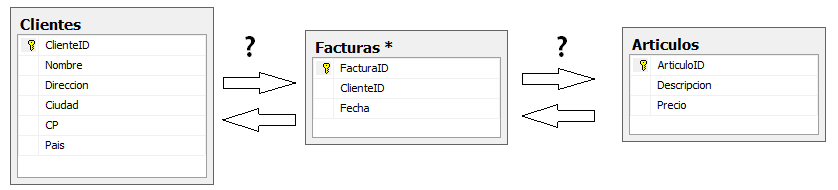

**¿Qué es lo que aparece nuevo?**

Entonces la idea ahora es agregar una nueva tabla que relacione nuestras dos tablas anteriores: Clientes y Articulos. Naturalmente, vamos a querer persistir los articulos comprados por cada uno de nuestros clientes en cada compra (podría haber más de una compra por cada cliente).

Tenemos que empezar a analizar las relaciones entre los elementos de las tablas.

1. ¿Un cliente puede hacer 1 o + compras?
2. ¿Una compra tendrá una factura asociada?
3. ¿Una factura puede pertenecer a 1 o + clientes?
4. ¿Una factura puede incluir 1 o + artículos?

Fijemos ciertos criterios:
- Una factura pertenecerá a un solo cliente
- Una factura puede tener muchos artículos

Hay una relación de "muchos a muchos" entre Factura y Articulos

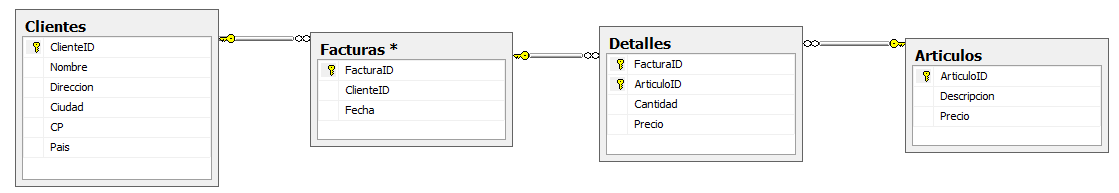

Comencemos creando la tabla Facturas y cargando algunas facturas

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
try:
    connection.execute("""CREATE TABLE Facturas (
                            FacturaID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
                            ClienteID INTEGER NOT NULL,
                            Fecha TEXT NOT NULL,
                            FOREIGN KEY (ClienteID) REFERENCES Clientes (ClienteID) 
                        )""")
    print('Tabla Facturas creada')
except sqlite3.OperationalError:
    print("Error al crear la tabla")
connection.close()

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (1, '2022-10-05')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (1, '2021-10-06')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (3, '2022-02-16')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (3, '2021-12-26')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (3, '2021-10-06')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (2, '2021-08-12')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (7, '2022-01-28')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (5, '2021-10-06')''')
connection.commit()
print('Cambios insertados')
cursor.close()
connection.close()

In [ ]:
print(query('SELECT * FROM Facturas'))

Ahora creamos la tabla Detalles y cargamos los items de cada una de las facturas creadas.

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
try:
    connection.execute("""CREATE TABLE Detalles (
                            FacturaID INTEGER  NOT NULL,
                            ArticuloID INTEGER  NOT NULL,
                            Cantidad INTEGER NOT NULL,
                            Precio REAL NOT NULL,
                            PRIMARY KEY (FacturaID, ArticuloID),
                            FOREIGN KEY (FacturaID) REFERENCES Facturas (FacturaID),
                            FOREIGN KEY (ArticuloID) REFERENCES Articulos (ArticuloID)
                        )""")
    print('Tabla Detalles creada')
except sqlite3.OperationalError:
    print("Error al crear la tabla")
connection.close()

In [ ]:
connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
''' Cliente 1'''
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (1, 1, 1, 148)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (1, 2, 1, 150)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (1, 3, 1, 149)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (2, 1, 2, 140)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (2, 2, 2, 140)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (2, 3, 2, 145)''')

''' Cliente 3'''
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (3, 4, 5, 1050.5)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (3, 5, 5, 840)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (4, 8, 10, 120)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (4, 9, 3, 250)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (4, 6, 11, 75)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (5, 7, 10, 500)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (5, 10, 1,  760.5)''')

''' Cliente 2''' 
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (6, 10, 2,  760.5)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (6, 1, 12,  85.75)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (6, 3, 3,  90.75)''')

''' Cliente 7''' 
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (7, 10, 3,  750.5)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (7, 1, 3,  145.5)''')

''' Cliente 5''' 
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 12, 10,  97)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 11, 7,  85)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 3, 4,  110)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 1, 4,  120)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 9, 2, 280)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 6, 7, 105)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 5, 1, 820.80)''')
connection.commit()
print('Cambios insertados')
cursor.close()
connection.close()

In [ ]:
for item in query('SELECT * FROM Detalles'):
  print(item)

print(len(query('SELECT * FROM Detalles')))



---
Ahora que ya tenemos las 4 tablas cargadas, podemos comenzar a hacer querys más complejas.

Recordemos el diagrama de base de datos que armamos, para poder guiarnos en los JOIN.



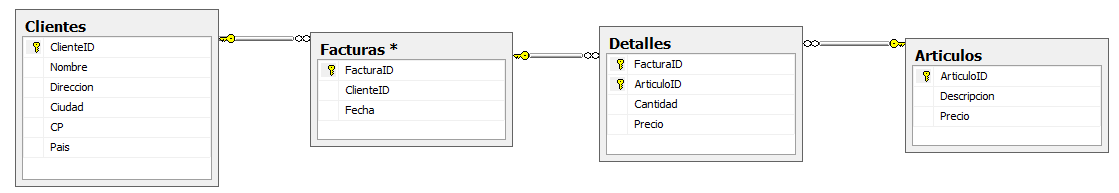

# Funciones de agregación y JOIN sobre tablas

Antes de comenzar voy a hacer una función para simplificar la ejecución de querys obteniendo Dataframes en lugar de arrays, para poder ver los nombres de las columnas.

In [ ]:
'''Esta función recibirá la query como string y devolverá un DataFrame'''
def query_df(query_text):
  connection=sqlite3.connect("Diplo_DB.db")
  df = pd.read_sql_query(query_text, connection)
  connection.close()
  return df

y recordemos los tipos de JOIN:

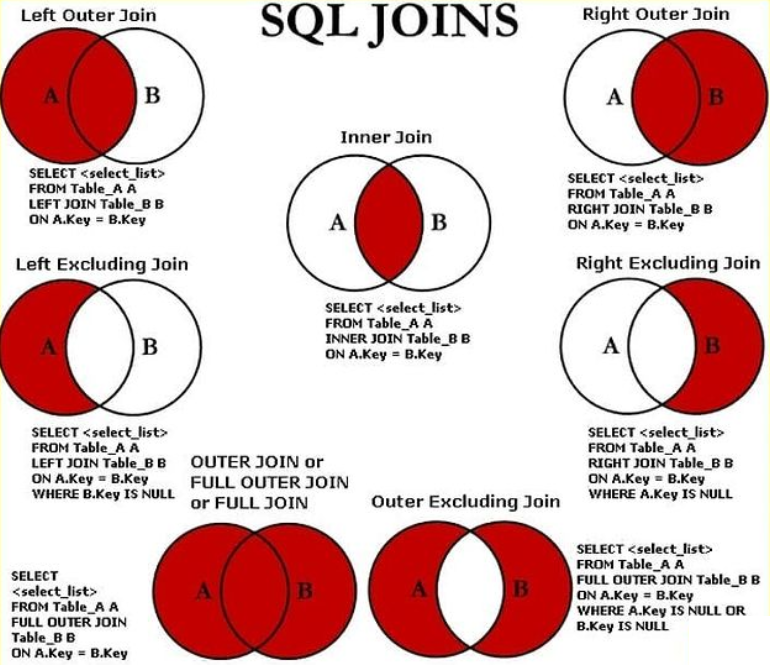

Ahora podemos por ejemplo, hacer un JOIN para obtener el listado de detalles que posee cada factura emitida. 

Vayamos refinando la consulta:

In [ ]:
sentencia = '''SELECT *
        FROM Facturas f
        LEFT JOIN Detalles d
        ON d.FacturaID = f.FacturaID'''

query_df(sentencia)

Análisis:

Los primeros 3 datos vienen de la tabla Facturas y los últimos 4 datos vienen de la tabla Detalles. 

Hay columnas que están repetidas, lo cual es lógico ya que incluyen FOREIGN KEYS de la otra tabla.

Podríamos especificar qué columnas queremos mostrar para no traernos todas:

In [ ]:
sentencia = '''SELECT f.FacturaID, ArticuloID, d.Cantidad, d.Precio
        FROM Facturas f
        LEFT JOIN Detalles d
        ON d.FacturaID = f.FacturaID'''

query_df(sentencia)

# Agregación de datos

Un dato relevante podría ser, para cada par "Precio, cantidad" calcular el Precio Total, entonces podríamos reemplazar esa columna en la tabla que devuelve nuestra query por una que calcule el precio total.

In [ ]:
sentencia = '''SELECT f.FacturaID, ArticuloID, Cantidad*Precio AS Total
        FROM Facturas f
        LEFT JOIN Detalles d
        ON d.FacturaID = f.FacturaID'''
query_df(sentencia)

**Funciones de agregación**

- MAX();
- MIN();
- AVG();
- SUM();
- COUNT(); --> Por defecto los NULL son excluidos y los duplicados incluidos


**¿Y si ahora quiero saber en lugar del total por artículo que tiene cada factura, el monto total de la factura?**

Debería ahora hacer uso de una función de agregación y la cláusula GROUP BY:

In [ ]:
sentencia = '''SELECT  f.FacturaID, SUM(Cantidad*Precio) as Total
        FROM Facturas f
        LEFT JOIN Detalles d
        ON d.FacturaID = f.FacturaID
        GROUP BY f.FacturaID'''

query_df(sentencia)

A la cláusula GROUP BY se la puede acompañar de otros modificadores, por ejemplo, HAVING para establecer condiciones booleanas.

¿Qué hará el siguiente código?

In [ ]:
sentencia = '''SELECT  f.FacturaID, SUM(Cantidad*Precio) as Total
        FROM Facturas f
        LEFT JOIN Detalles d
        ON d.FacturaID = f.FacturaID
        GROUP BY f.FacturaID
        HAVING Total > 4000'''

query_df(sentencia)



---
# JOIN con más de dos tablas

Análogamente, podemos hacer JOIN con más de dos tablas. De hecho es lo más común que veremos cuando trabajemos con bases de datos relacionales. Si están correctamente diseñadas, la información estará separada en múltiples tablas. 

Por ejemplo si quisieramos mostrar:
- Número de Factura --> Sale de la tabla Facturas
- Nombre del cliente --> Sale de la tabla Clientes
- Precio total de la compra --> Sale de la tabla Detalles



In [ ]:
# Primera aproximación
sentencia = '''SELECT f.FacturaID, d.ArticuloID, Nombre, Cantidad, Precio
        FROM Facturas f
        LEFT JOIN Detalles d
        ON d.FacturaID = f.FacturaID
        LEFT JOIN Clientes c
        on c.ClienteID = f.ClienteID
        '''
query_df(sentencia)

In [ ]:
# Hago la agregación
sentencia = '''SELECT f.FacturaID, Nombre, SUM (Cantidad*Precio) as Total
        FROM Facturas f
        LEFT JOIN Detalles d
        ON d.FacturaID = f.FacturaID
        LEFT JOIN Clientes c
        on c.ClienteID = f.ClienteID
        GROUP BY f.FacturaID
        '''
query_df(sentencia)

# SELECT anidados

Otra posibilidad que SQL nos dá es ejecutar sentencias SELECT anidadas.

Por ejemplo, si a partir de la query anterior quisieramos quedarnos únicamente con el importe mayor de todas las facturas, podríamos simplemente anidar la misma query dentro de otro SELECT de nivel superior.

In [ ]:
sentencia = '''
        SELECT MAX(Total) as Monto_Maximo
        FROM 
          (
          SELECT f.FacturaID, Nombre, SUM (Cantidad*Precio) as Total
          FROM Facturas f
          LEFT JOIN Detalles d
          ON d.FacturaID = f.FacturaID
          LEFT JOIN Clientes c
          on c.ClienteID = f.ClienteID
          GROUP BY f.FacturaID
          )
        '''
query_df(sentencia)



---
Si cargamos una base de datos SQLite generada por otro, podemos consultar:
1. El nombre de las tablas que tiene la base de datos


In [ ]:
print(query('''SELECT name 
FROM sqlite_master 
WHERE type=\'table\'
AND name NOT LIKE \'sqlite_%\' '''
))

2. Podemos ver el contenido de una tabla en particular:

In [ ]:
print(query('SELECT name, type FROM pragma_table_info(\'Clientes\')'))